# Aryan Bhatt

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [61]:
df = pd.read_csv('student_scores.csv')

In [62]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


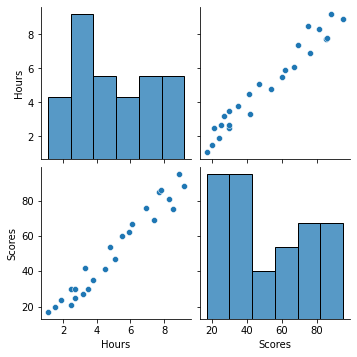

In [65]:
sns.pairplot(df)

<AxesSubplot:>

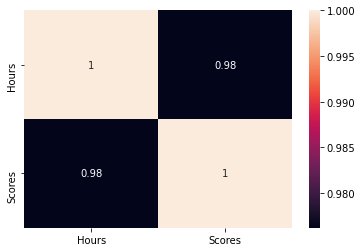

In [66]:
sns.heatmap(df.corr(), annot = True)

In [67]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

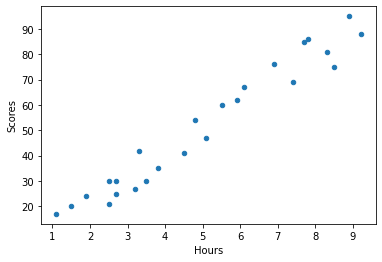

In [68]:
df.plot.scatter('Hours','Scores')

In [69]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(x_train, y_train)
print('Training Complete')

Training Complete


In [73]:
print(lm.intercept_)

2.370815382341881


In [74]:
print(lm.coef_)

[9.78856669]


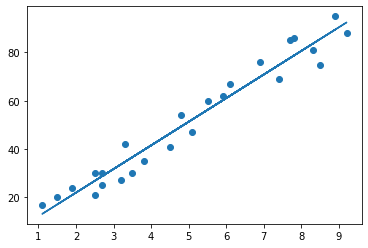

In [75]:
# Plotting the regression line
line = lm.coef_*x + lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Predictions

In [76]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [77]:
predictions = lm.predict(x_test)

## Comparing actual vs predicted

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

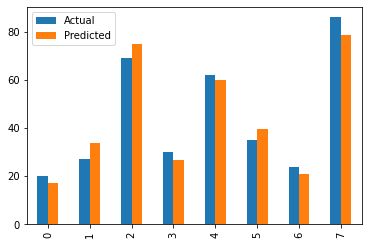

In [79]:
df.plot(kind = 'bar')

In [80]:
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


## Evaluating

In [81]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  4.419727808027652
Mean Squared Error:  22.96509721270043
Root Mean Squared Error:  4.792191274636315
